In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap)

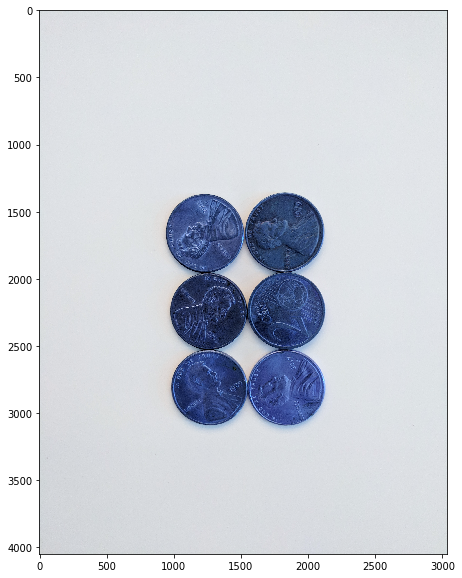

In [3]:
sep_coins = cv2.imread('course/DATA/pennies.jpg')

display(sep_coins)

In [4]:
# Median blur
# Grayscale
# Binary threshold
# Find contours

In [5]:
sep_blur = cv2.blur(sep_coins, ksize=(25,25))

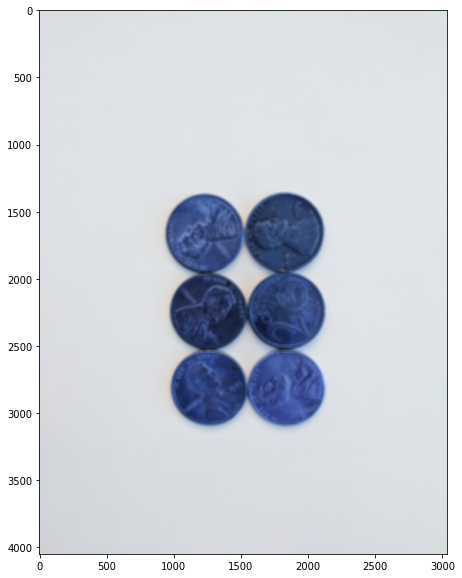

In [6]:
display(sep_blur)

In [7]:
gray_sep_blur = cv2.cvtColor(sep_blur, cv2.COLOR_BGR2GRAY)

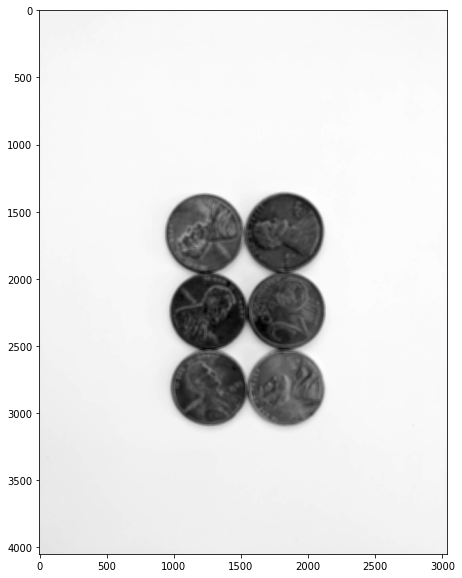

In [8]:
display(gray_sep_blur)

In [9]:
ret, sep_thresh = cv2.threshold(gray_sep_blur, 160, 255, cv2.THRESH_BINARY_INV)

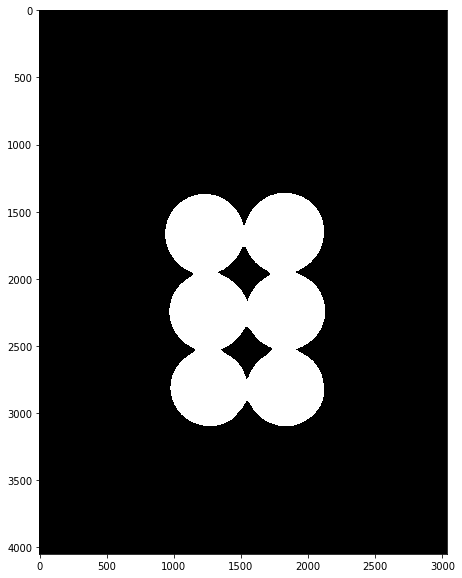

In [10]:
display(sep_thresh)

In [11]:
image, contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [12]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)

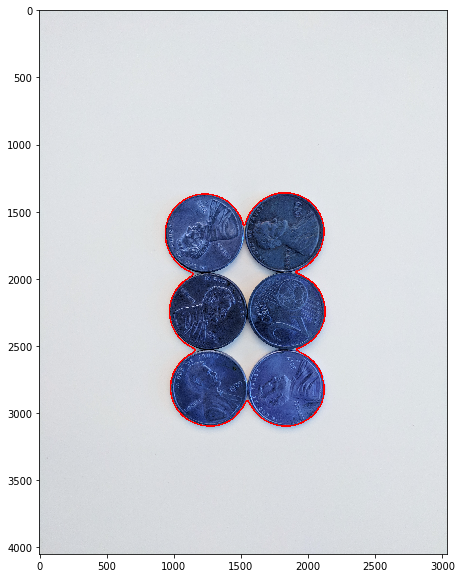

In [13]:
display(sep_coins)

In [14]:
img = cv2.imread('course/DATA/pennies.jpg')

In [15]:
img = cv2.medianBlur(img, 35)

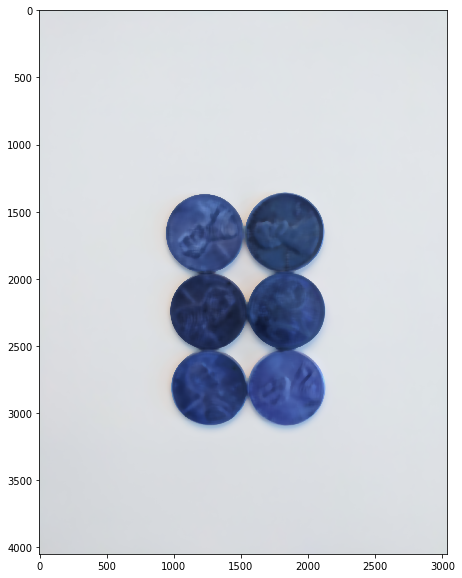

In [16]:
display(img)

In [17]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [18]:
ret, gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

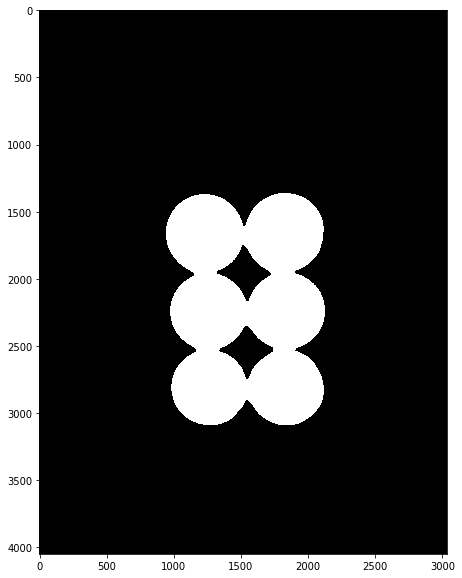

In [19]:
display(gray)

In [20]:
# NOISE REMOVAL

In [21]:
kernel = np.ones((3,3), np.uint8)

In [22]:
sure_bg = cv2.dilate(gray,kernel,iterations=3)

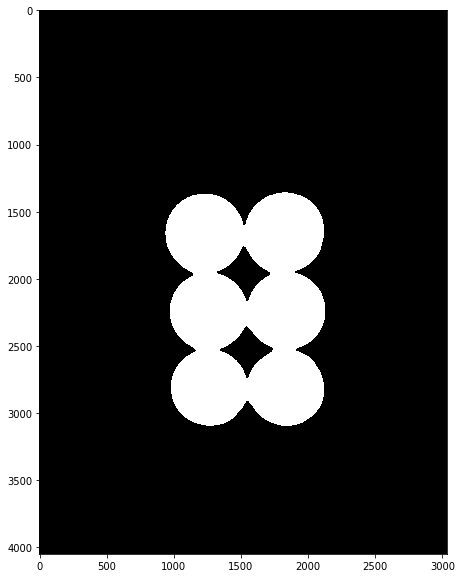

In [23]:
display(sure_bg)

In [24]:
gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, iterations=2)

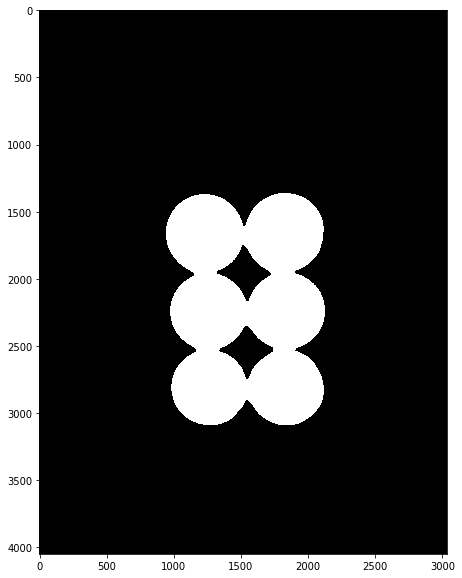

In [25]:
display(gray)

In [26]:
dist_transform = cv2.distanceTransform(gray, cv2.DIST_L2, 5)

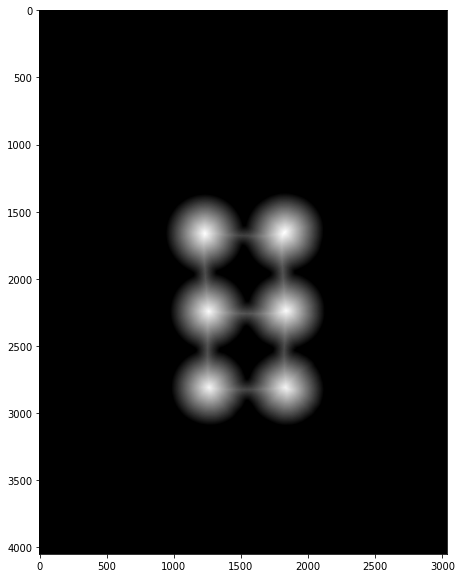

In [27]:
display(dist_transform)

In [28]:
ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)

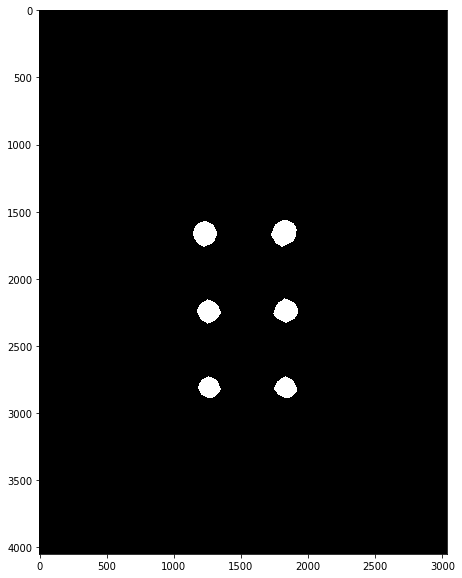

In [29]:
display(sure_fg)

In [30]:
sure_fg = np.uint8(sure_fg)

In [31]:
unknown = cv2.subtract(sure_bg, sure_fg)

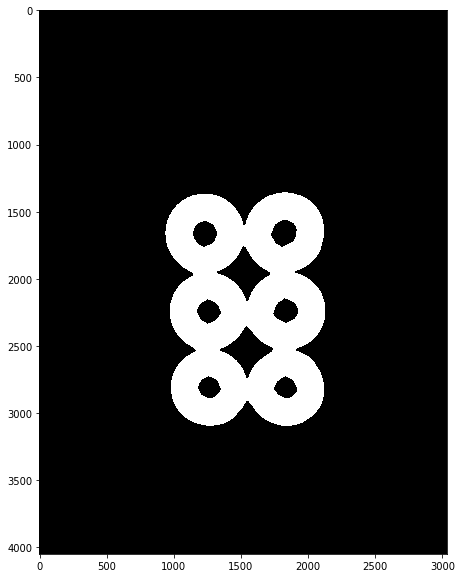

In [32]:
display(unknown)

In [33]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers + 1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

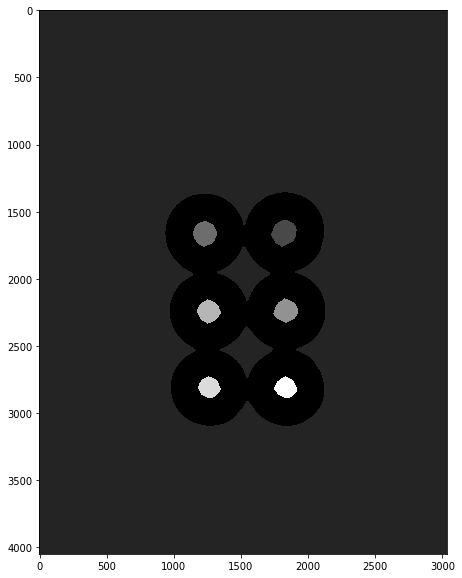

In [34]:
display(markers,cmap='gray')

In [35]:
markers = cv2.watershed(img,markers)

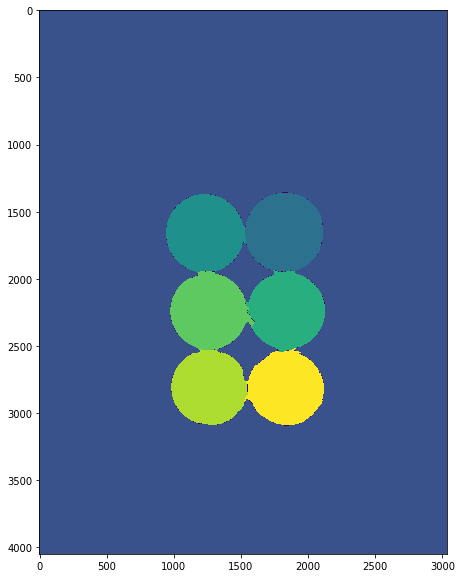

In [37]:
display(markers, None)

In [38]:
image, contours, hierarchy = cv2.findContours(markers.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# For every entry in contours
for i in range(len(contours)):
    
    # last column in the array is -1 if an external contour (no contours inside of it)
    if hierarchy[0][i][3] == -1:
        
        # We can now draw the external contours from the list of contours
        cv2.drawContours(sep_coins, contours, i, (255, 0, 0), 10)

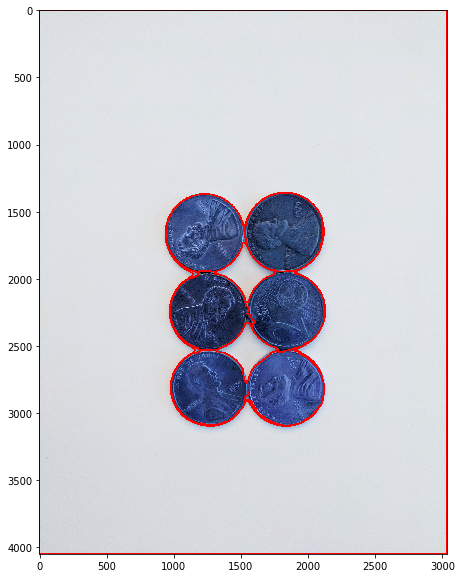

In [39]:
display(sep_coins)